Mounted at /content/drive
Number of spam emails: 1499
Number of ham emails: 3672


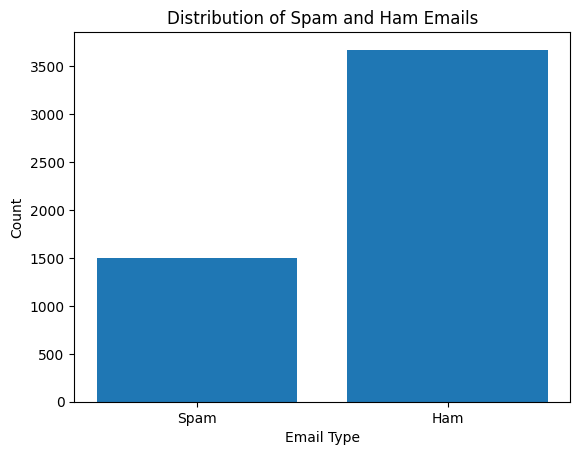

Epoch 1/10
104/104 [==============================] - 12s 105ms/step - loss: 0.2848 - accuracy: 0.8836 - val_loss: 0.1125 - val_accuracy: 0.9783
Epoch 2/10
104/104 [==============================] - 10s 92ms/step - loss: 0.0497 - accuracy: 0.9900 - val_loss: 0.0761 - val_accuracy: 0.9819
Epoch 3/10
104/104 [==============================] - 10s 98ms/step - loss: 0.0275 - accuracy: 0.9952 - val_loss: 0.0734 - val_accuracy: 0.9819
Epoch 4/10
104/104 [==============================] - 10s 101ms/step - loss: 0.0093 - accuracy: 0.9988 - val_loss: 0.1669 - val_accuracy: 0.9722
Epoch 5/10
104/104 [==============================] - 11s 105ms/step - loss: 0.0150 - accuracy: 0.9982 - val_loss: 0.1755 - val_accuracy: 0.9783
Epoch 6/10
104/104 [==============================] - 9s 89ms/step - loss: 0.0072 - accuracy: 0.9991 - val_loss: 0.1529 - val_accuracy: 0.9795
Epoch 7/10
104/104 [==============================] - 10s 99ms/step - loss: 0.0044 - accuracy: 0.9994 - val_loss: 0.1362 - val_accurac

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


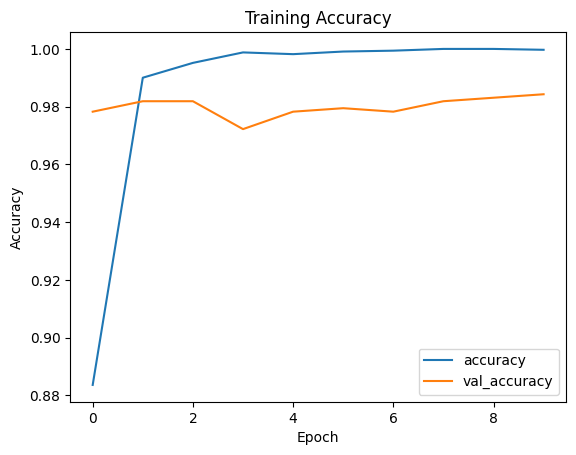

33/33 [==============================] - 1s 28ms/step
Accuracy: 0.9855072463768116
Confusion Matrix:
 [[732  10]
 [  5 288]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       742
           1       0.97      0.98      0.97       293

    accuracy                           0.99      1035
   macro avg       0.98      0.98      0.98      1035
weighted avg       0.99      0.99      0.99      1035



In [1]:
# @title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Update dataset path
dataset_path = '/content/drive/My Drive/dataset/spam_ham_dataset.csv'

# Load dataset using Pandas to load data
dataset = pd.read_csv(dataset_path)

# Exploratory Data Analysis (EDA) here performing
spam_count = dataset['label'].value_counts()['spam']
ham_count = dataset['label'].value_counts()['ham']

print("Number of spam emails:", spam_count)
print("Number of ham emails:", ham_count)

plt.bar(['Spam', 'Ham'], [spam_count, ham_count])
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Distribution of Spam and Ham Emails')
plt.show()

# Data Preprocessing
X = dataset['text']
y = dataset['label_num']

# Splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature extraction using CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Splitting dataset into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Convert sparse matrices to dense arrays
X_train = X_train.toarray()
X_test = X_test.toarray()
X_val = X_val.toarray()

# Model Building
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
# Training the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Save the model in h5 which i used for testing purpose
model.save('/content/drive/My Drive/dataset/spam_ham_model.h5')

# Save the vectorizer
import pickle
with open('/content/drive/My Drive/dataset/vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

# Plot training history graph
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')
plt.show()

# Evaluation done here
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

